In [1]:
#Collborative Filtering - It is a type of filtering which is based on the user behaviour(ratings, clicks and purchases).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Import ratings dataset
ratings_Org_Data=pd.read_csv('Movies-dataset/ratings.csv')
ratings_Org_Data['timestamp'] = pd.to_datetime(ratings_Org_Data['timestamp'], unit='s')
ratings_Org_Data=ratings_Org_Data.dropna()
ratings_Org_Data.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

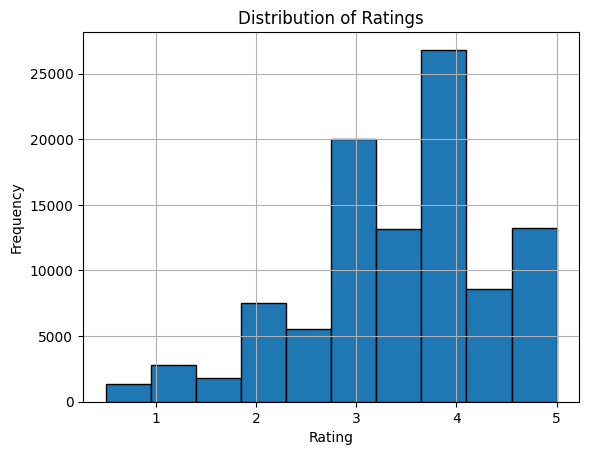

In [6]:
# Plotting histogram to check the distribution of data for different ratings in the dataset
ratings_Org_Data['rating'].hist(bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
movie_count=ratings_Org_Data['movieId'].value_counts()
print(movie_count)
user_count=ratings_Org_Data['userId'].value_counts()
print(user_count)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64
userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64


In [12]:
#We need to remove the users and movies with low count. The fundamental of collaborative filtering is overlapping of data.
# A movie is recommended to a user A who rated the same movies as user B and if there is a movie which is not watched by
# user A but by B so that movie will be suggested to user A as both A and B rated some common movies.
# As the concept is common movies rated so there will be users who rated only few movies and movies which are rated by very little users so
# we need to remove that as they are outliers and cannot help much in cosine or Pearson methods to find the score of overlapping and can
# distort the recommendation.

In [14]:
filtered_ratings = ratings_Org_Data[
    ratings_Org_Data['movieId'].isin(movie_count[movie_count >= 50].index) &
    ratings_Org_Data['userId'].isin(user_count[user_count >= 20].index)
]

In [16]:
filtered_ratings.count()

userId       41360
movieId      41360
rating       41360
timestamp    41360
dtype: int64